### Script to check if IS correlates with
1. Dosage range overlap; GDSC mid dosage (just a vaue to summarize dosage range tested)
2. ic50 (to show resistant pairs tend to be less inconsistent)
3. Target pathway
##### Also, plot corr of ic50 from ccle and gdsc 

NOTE!!!!!!: rerun script after generating "GDSC_pair_dosage_range.csv" from Task0a script

In [1]:
__author__ = 'Aanchal'

In [2]:
import pandas as pd
import FUNCTIONS as f
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats  as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
th=7.06
FeatureMatrix=pd.read_csv('../data_processed/FittedCurvesCommonPairs_features/Feature_Matrix_FLatPerDrugFitting_15features.csv') # #Normalized_outliersCapped

In [4]:
FeatureMatrix

,Standard cell line name,Standard drug name,HDI_mindosage,HDI_ab_dosage,HDI_middosage,HDI_bc_dosage,HDI_maxdosage,HDI_ic50,HDI_m,Area_between_fitted_curves_5dosages,m_mode,ic50_mode,mae_fitness,width,log2(min_dosage_bothDatasets),log2(max_dosage_bothDatasets),IS
0,22RV1,Nilotinib,0.002426,0.005650,0.013990,0.039161,0.165758,20.040970,1.890230,0.415955,0.486070,11.325927,0.167565,11.643856,-8.643856,3.000000,0.035723
1,22RV1,Selumetinib,0.193853,0.196574,0.183353,0.186264,0.266531,15.413213,0.309432,2.318241,0.143434,5.827724,0.139122,11.643856,-8.643856,3.000000,0.199096
2,22RV1,Nutlin-3a,0.010427,0.026046,0.064362,0.148200,0.275634,3.320041,1.274590,1.110936,0.851377,3.535129,0.075539,11.643856,-8.643856,3.000000,0.095410
3,22RV1,Palbociclib,0.129242,0.179996,0.228332,0.272591,0.443303,9.105279,0.647930,2.815461,0.354280,2.543526,0.153789,11.643856,-8.643856,3.000000,0.241798
4,22RV1,PD0325901,0.175761,0.179537,0.171550,0.222212,0.348005,12.397516,0.311910,2.714341,0.202737,2.573674,0.113544,13.000000,-10.000000,3.000000,0.208795
5,22RV1,Tanespimycin,0.034002,0.094562,0.232625,0.338196,0.314477,2.325434,1.147841,2.444113,0.825627,0.091597,0.114448,11.643856,-8.643856,3.000000,0.209906
6,22RV1,PLX-4720,0.012337,0.022906,0.043091,0.089492,0.257659,17.263353,1.591559,0.868976,0.526606,6.669559,0.116826,11.965784,-8.643856,3.321928,0.072622
7,22RV1,Panobinostat,0.135091,0.251780,0.105962,0.016220,0.002273,0.988890,1.005521,1.288521,1.247915,-6.131590,0.064676,11.643856,-8.643856,3.000000,0.110661
8,42-MG-BA,Selumetinib,0.121585,0.151563,0.172399,0.184986,0.274792,15.175882,0.442290,2.058452,0.189853,5.740565,0.134802,11.643856,-8.643856,3.000000,0.176784
9,42-MG-BA,Nutlin-3a,0.023178,0.036070,0.057833,0.094532,0.174375,19.709553,1.770027,0.836063,0.337036,9.177279,0.160876,11.643856,-8.643856,3.000000,0.071803


In [5]:
#merge with the foll to get GDSC min and mid dosage
#pair_dosages=pd.read_csv('../data_processed/GDSC_pair_dosage_range.csv').sort_values('Standard cell line name')
#pair_dosages['mid_dosage']=pair_dosages['min_dosage']+(pair_dosages['max_dosage']-pair_dosages['min_dosage'])/2
#FeatureMatrix=pd.merge(FeatureMatrix, pair_dosages,on=['Standard cell line name','Standard drug name']) 

In [6]:
#filter resistant Cls sp=sensitivePairs
FeatureMatrix_sp=FeatureMatrix[FeatureMatrix['ic50_mode']<=th]

#filter Cls which havent been tested for all drugs
all_cls=FeatureMatrix.groupby(FeatureMatrix['Standard cell line name']).count()[['Standard drug name']]
FeatureMatrix_impcls=FeatureMatrix.loc[FeatureMatrix['Standard cell line name'].isin(all_cls[all_cls['Standard drug name']==15].index)]
#filter resistant Cls  sp_ic=sensitivePairs_impcls
FeatureMatrix_sp_ic=FeatureMatrix_impcls[FeatureMatrix_impcls['ic50_mode']<=th]

In [7]:
FeatureMatrix_sp=f.getSensitivityMetrics(FeatureMatrix_sp)
FeatureMatrix_sp_ic=f.getSensitivityMetrics(FeatureMatrix_sp_ic)


In [8]:
plotting_df1=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/drug_analysis_onlySensitiveCLs.csv', index_col=0) #1843 DW/sensitive pairs
plotting_df2=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/drug_analysis_onlySensitiveCLs_testedFor15drugs.csv', index_col=0) #67 Cls which have been tested for all 15 drugs

plotting_df1['GDSC mid dosage']=(plotting_df1['GDSC min dosage']+(plotting_df1['GDSC max dosage']-plotting_df1['GDSC min dosage'])/2).round(2)
plotting_df2['GDSC mid dosage']=(plotting_df2['GDSC min dosage']+(plotting_df2['GDSC max dosage']-plotting_df2['GDSC min dosage'])/2).round(2)


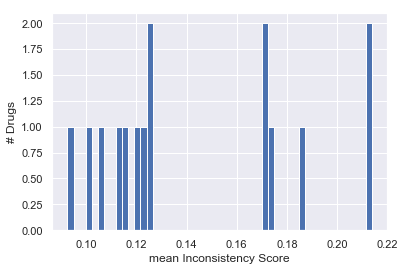

In [9]:
from pylab import hist
hist(plotting_df1['mean IS'],50,label='Drugs')
plt.xlabel('mean Inconsistency Score')
plt.ylabel('# Drugs')
plt.savefig('../figures/InconsistencyFactorAnalysis/meanISperDrug_distibution.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/meanISperDrug_distibution.png')

### Factor1: IS (median AAA) vs overlap

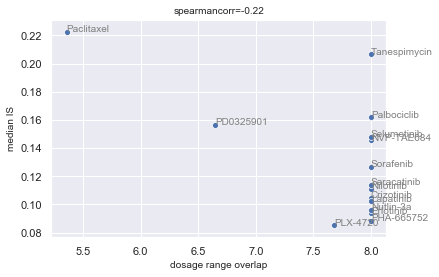

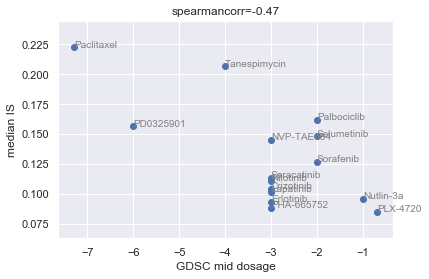

In [10]:
#plot distribution or median instead of just mean
#f.clusteringBoxplot(AAA_matrix, 'Standard drug name', 'IS','',-0.1,1)

f.plotVectorsGetCorr_seaborn('dosage range overlap','median IS',plotting_df2,'spearman' )
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'dosage range overlap'], plotting_df2.loc[txt,'median IS'], txt, color='grey')

plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_overlap.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_overlap.png')
plt.show()

#min and mid dosages are equally corealted since mid is just shifted from min with a few units

f.plotVectorsGetCorr(plotting_df2, 'GDSC mid dosage',plotting_df2,'median IS',[],'spearman' )
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'GDSC mid dosage'], plotting_df2.loc[txt,'median IS'], txt, color='grey')

plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_GDSCmidDosage.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_GDSCmidDosage.png')
plt.show()

In [11]:
#p val
p=stats.pearsonr(plotting_df2['dosage range overlap'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['dosage range overlap'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(3)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(3)) )

p=stats.pearsonr(plotting_df2['GDSC mid dosage'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['GDSC mid dosage'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(3)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(3)) )

#plotting_df2['dosage range overlap'].corr(plotting_df2['median IS'],method='spearman')

Pearson r, pval: -0.6, 0.018
Spearman r, pval: -0.22, 0.421
Pearson r, pval: -0.67, 0.006
Spearman r, pval: -0.47, 0.075


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

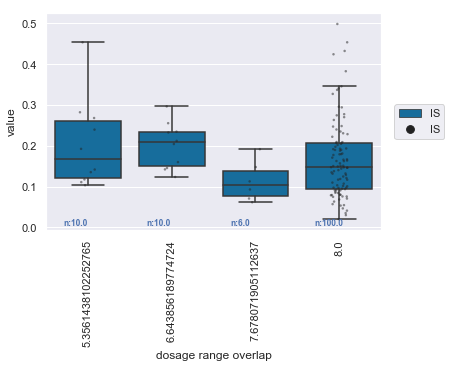

In [12]:
f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2),'dosage range overlap','IS', 'A',0,0)
plt.xticks(rotation=90)

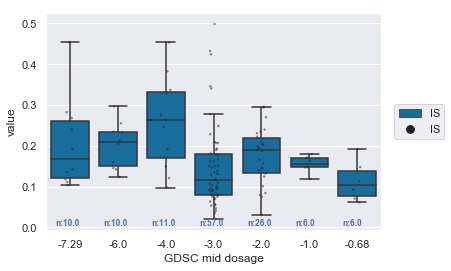

In [13]:
f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2),'GDSC mid dosage','IS', 'A',0,0 )

##### Plot to show gdsc is less sensitive than ccle at lower ranges (ranges to the left)

In [14]:
#f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2) , 'GDSC mid dosage',['ic50_ccle','ic50_gdsc'],'',0.11,0)
#f.clusteringBoxplot(FeatureMatrix_sp_ic.merge(plotting_df2) , 'GDSC mid dosage',['cd@midDosageOfGdsc_ccle','cd@midDosageOfGdsc_gdsc'],'',0.11,0)

##### effect of moA

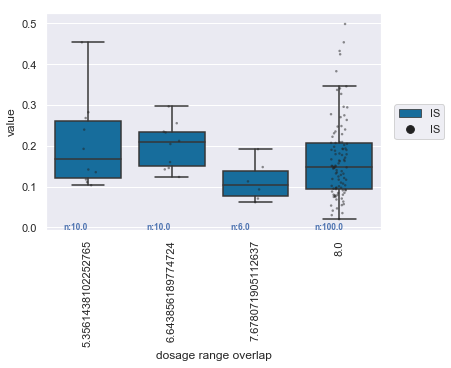

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

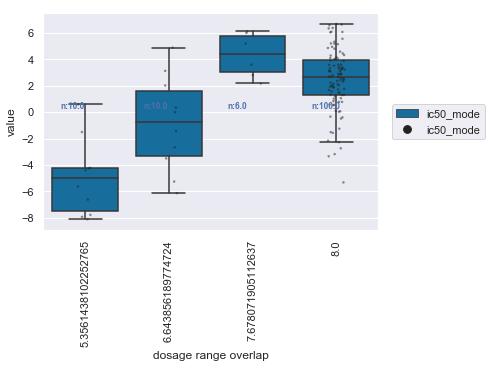

In [15]:
pdf =FeatureMatrix_sp_ic.merge(plotting_df2)
f.clusteringBoxplot(pdf.sort_values('median IS') , 'dosage range overlap','IS','',-0.01,0)#, plotting_df1.groupby(['Target Pathway'])['median ic50_mode','median IS'].first().sort_values('median IS').index)
plt.xticks(rotation=90)
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerOverlap.svg', bbox_inches='tight')
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerOverlap.png', bbox_inches='tight')
plt.show()


f.clusteringBoxplot(pdf.sort_values('ic50_mode') , 'dosage range overlap','ic50_mode','',0.11,0)
plt.xticks(rotation=90)

#f.plotVectorsGetCorr_seaborn('dosage range overlap','IS',pdf ,'spearman','Standard drug name', 18)

#### Are the good drugs with overlap of 2 uM good (not following the trend) because they are inactive drugss? => YES

### Factor2: mean AAA vs (median ic50_mode)

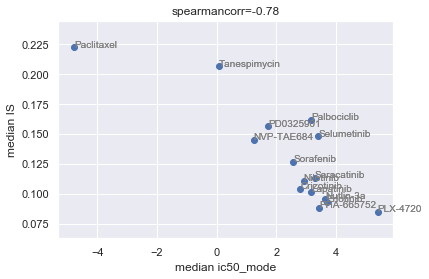

In [16]:
f.plotVectorsGetCorr(plotting_df2,'median ic50_mode',plotting_df2,'median IS',plotting_df2['Standard drug name'] ,'spearman')
for i, txt in enumerate(plotting_df2['Standard drug name']):
        plt.text(plotting_df2.loc[txt,'median ic50_mode'], plotting_df2.loc[txt,'median IS'], txt, color='grey')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_medianIC50mode.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/medianIS_vs_medianIC50mode.png')
plt.show()


In [17]:
#p val
p=stats.pearsonr(plotting_df2['median ic50_mode'], plotting_df2['median IS'])
s=stats.spearmanr(plotting_df2['median ic50_mode'], plotting_df2['median IS'])
print("Pearson r, pval: "+str(p[0].round(2) ) +', '+str(p[1].round(4)))
print("Spearman r, pval: "+str(s[0].round(2) )+', '+str(s[1].round(4)) )

Pearson r, pval: -0.84, 0.0001
Spearman r, pval: -0.78, 0.0006


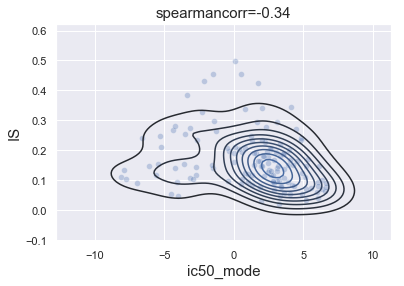

In [18]:
f.plotVectorsGetCorr_seaborn('ic50_mode','IS',FeatureMatrix_sp_ic ,'spearman','', 15, 0.3)
sns.kdeplot(FeatureMatrix_sp_ic['ic50_mode'],FeatureMatrix_sp_ic['IS'])
plt.savefig('../figures/InconsistencyFactorAnalysis/IS_vs_IC50mode.svg')
plt.savefig('../figures/InconsistencyFactorAnalysis/IS_vs_IC50mode.png')
plt.show()

### Factor2: mean AAA vs (Target pathway)

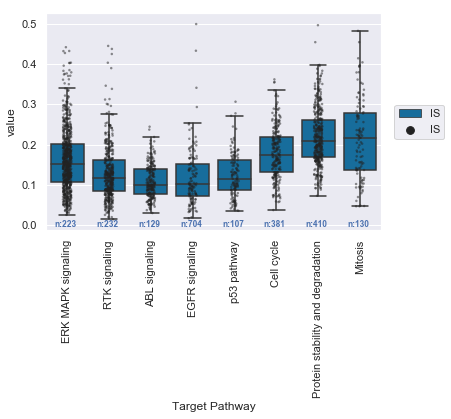

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

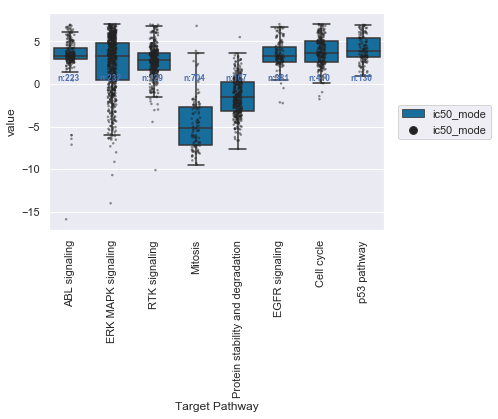

In [19]:
## FeatureMatrix_sensitivePairs_impcls if u want to apply 2 constrainst on CLs
pdf = FeatureMatrix_sp.merge(plotting_df1)
f.clusteringBoxplot(pdf.sort_values('median IS') , 'Target Pathway','IS','',-0.01,0)#, plotting_df1.groupby(['Target Pathway'])['median ic50_mode','median IS'].first().sort_values('median IS').index)
plt.xticks(rotation=90)
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerPathway.svg', bbox_inches='tight')
plt.savefig('../figures/InconsistencyFactorAnalysis/bp_ISdistributionPerPathway.png', bbox_inches='tight')
plt.show()

f.clusteringBoxplot(pdf.sort_values('ic50_mode') , 'Target Pathway','ic50_mode','',0.11,0)
plt.xticks(rotation=90)

In [20]:
plotting_df1.groupby(['Target Pathway','Standard drug name'])['dosage range overlap','median ic50_mode','median IS'].first().round(2)
#plotting_df.sort_values(['Target Pathway','Standard drug name'])
#plotting_df.set_index(['Target Pathway','Standard drug name'])

dosage range overlap  \
Target Pathway                    Standard drug name                         
ABL signaling                     Nilotinib                           8.00   
Cell cycle                        Palbociclib                         8.00   
EGFR signaling                    Erlotinib                           8.00   
                                  Lapatinib                           8.00   
ERK MAPK signaling                PD0325901                           6.64   
                                  PLX-4720                            7.68   
                                  Selumetinib                         8.00   
Mitosis                           Paclitaxel                          5.36   
Protein stability and degradation Tanespimycin                        8.00   
RTK signaling                     Crizotinib                          8.00   
                                  NVP-TAE684                          8.00   
                                  PHA-665752                          8.00   
                                  Saracatinib                         8.00   
                                  Sorafenib                           8.00   
p53 pathway                       Nutlin-3a                           8.00   

                                                      median ic50_mode  \
Target Pathway                    Standard drug name                     
ABL signaling                     Nilotinib                       3.26   
Cell cycle                        Palbociclib                     3.66   
EGFR signaling                    Erlotinib                       3.42   
                                  Lapatinib                       3.15   
ERK MAPK signaling                PD0325901                       1.24   
                                  PLX-4720                        4.65   
                                  Selumetinib                     3.21   
Mitosis                           Paclitaxel                     -5.19   
Protein stability and degradation Tanespimycin                   -1.50   
RTK signaling                     Crizotinib                      2.90   
                                  NVP-TAE684                      1.24   
                                  PHA-665752                      3.51   
                                  Saracatinib                     3.12   
                                  Sorafenib                       2.73   
p53 pathway                       Nutlin-3a                       3.85   

                                                      median IS  
Target Pathway                    Standard drug name             
ABL signaling                     Nilotinib                0.10  
Cell cycle                        Palbociclib              0.17  
EGFR signaling                    Erlotinib                0.10  
                                  Lapatinib                0.10  
ERK MAPK signaling                PD0325901                0.18  
                                  PLX-4720                 0.08  
                                  Selumetinib              0.16  
Mitosis                           Paclitaxel               0.22  
Protein stability and degradation Tanespimycin             0.20  
RTK signaling                     Crizotinib               0.11  
                                  NVP-TAE684               0.15  
                                  PHA-665752               0.09  
                                  Saracatinib              0.12  
                                  Sorafenib                0.12  
p53 pathway                       Nutlin-3a                0.12

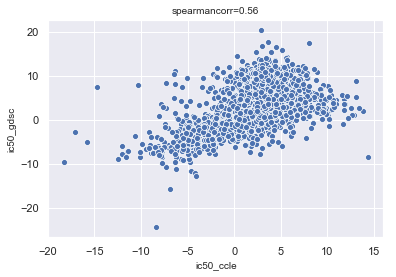

Paclitaxel : 0.42
Tanespimycin : 0.57
PD0325901 : 0.6
NVP-TAE684 : 0.37
Palbociclib : -0.01
Crizotinib : 0.25
Erlotinib : 0.13
Lapatinib : 0.29
Nilotinib : 0.02
PHA-665752 : 0.2
Saracatinib : 0.42
Sorafenib : 0.32
Selumetinib : 0.43
Nutlin-3a : 0.28
PLX-4720 : 0.32


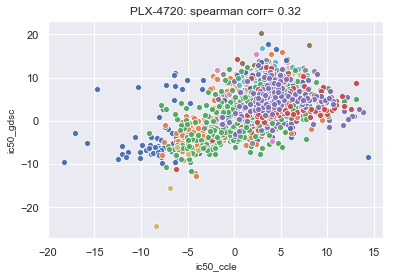

In [21]:
#Corr bw ccle ic50 and gdsc ic50
plotting_df=FeatureMatrix_sp.merge(plotting_df1)

corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',plotting_df,'spearman' )
plt.show()
#df=plotting_df[(plotting_df['Standard drug name'] !='Tanespimycin') & (plotting_df['Standard drug name'] !='Paclitaxel') ] 
#corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',df,'spearman' )

dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Lapatinib']
#dname_list=['Lapatinib']
for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    df=plotting_df[plotting_df['Standard drug name']==dname]
    corr=f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',df,'spearman' )

    plt.title(dname+": spearman corr= "+str(corr))
    #plt.show()
    print(dname+" : "+str(corr)) #outlier include, gdsc muts, actlitaxel corr incsed to 0.23

plt.show() 

In [23]:
FeatureMatrix_sp_ic

,Standard cell line name,Standard drug name,HDI_mindosage,HDI_ab_dosage,HDI_middosage,HDI_bc_dosage,HDI_maxdosage,HDI_ic50,HDI_m,Area_between_fitted_curves_5dosages,...,ic50_mode,mae_fitness,width,log2(min_dosage_bothDatasets),log2(max_dosage_bothDatasets),IS,ic50_ccle,ic50_gdsc,m_ccle,m_gdsc
288,C2BBe1,Nilotinib,0.024616,0.045672,0.087526,0.197640,0.649317,14.192730,1.824148,1.943956,...,2.894762,0.188387,11.643856,-8.643856,3.000000,0.166951,2.904281,5.243139,0.395906,0.321212
289,C2BBe1,Selumetinib,0.182867,0.208395,0.199209,0.238460,0.372052,7.215400,0.449388,2.688345,...,1.291576,0.136069,11.643856,-8.643856,3.000000,0.230881,1.953625,0.201917,0.404242,0.124936
290,C2BBe1,Nutlin-3a,0.054765,0.080666,0.124149,0.211892,0.480846,17.616484,1.175665,1.992591,...,5.319255,0.174243,11.643856,-8.643856,3.000000,0.171128,9.200649,1.451450,0.271700,0.913717
291,C2BBe1,Palbociclib,0.028109,0.057926,0.123417,0.289077,0.670963,7.460268,1.236977,2.386864,...,2.652196,0.130043,11.643856,-8.643856,3.000000,0.204989,2.778304,1.602238,0.991678,0.344721
292,C2BBe1,PD0325901,0.316050,0.252434,0.230883,0.331063,0.429268,14.683330,0.353110,3.857878,...,-1.434764,0.153007,13.000000,-10.000000,3.000000,0.296760,3.961548,-5.129062,0.134798,0.677374
293,C2BBe1,Tanespimycin,0.055024,0.143985,0.286705,0.460153,0.271290,2.905189,1.204546,3.068158,...,-1.254286,0.166577,11.643856,-8.643856,3.000000,0.263500,0.194886,-2.265307,0.671743,1.210127
295,C2BBe1,Sorafenib,0.010126,0.019140,0.038436,0.085903,0.302858,19.337014,1.791997,0.873203,...,5.542708,0.145481,11.643856,-8.643856,3.000000,0.074993,6.460094,2.325854,0.475202,0.277326
296,C2BBe1,Saracatinib,0.025099,0.060905,0.108758,0.152341,0.268024,1.874912,0.467347,1.363976,...,1.291276,0.059196,11.643856,-8.643856,3.000000,0.117141,0.827032,0.995043,0.542572,0.795762
298,C2BBe1,NVP-TAE684,0.007323,0.030090,0.094984,0.140994,0.211837,1.104298,0.599407,1.093496,...,1.051821,0.060822,11.643856,-8.643856,3.000000,0.093912,1.107385,1.092504,1.003671,0.711797
299,C2BBe1,Crizotinib,0.005941,0.013169,0.031596,0.092513,0.534436,17.791957,2.176141,1.186121,...,3.265015,0.182504,11.643856,-8.643856,3.000000,0.101867,3.348534,8.257127,0.480549,0.624466


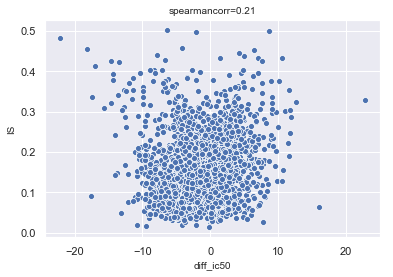

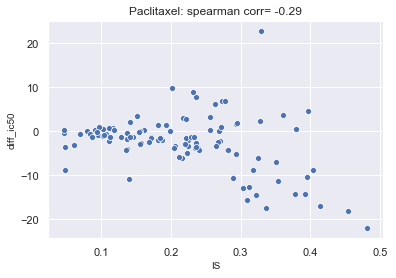

Paclitaxel : -0.29


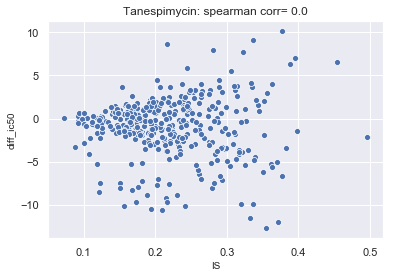

Tanespimycin : 0.0


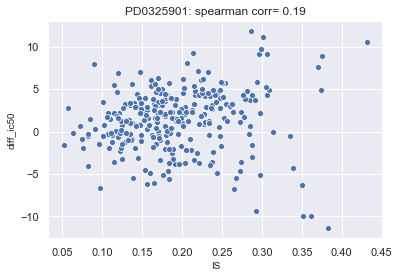

PD0325901 : 0.19


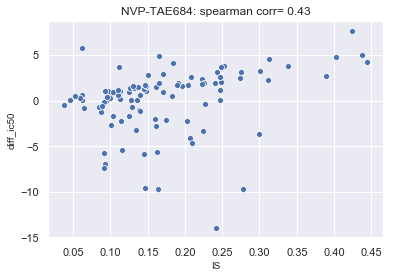

NVP-TAE684 : 0.43


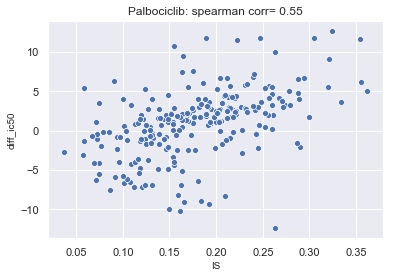

Palbociclib : 0.55


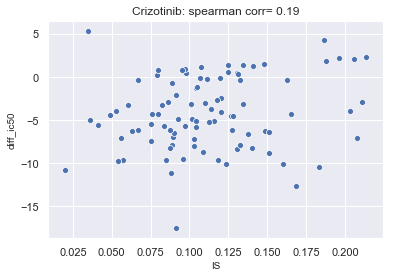

Crizotinib : 0.19


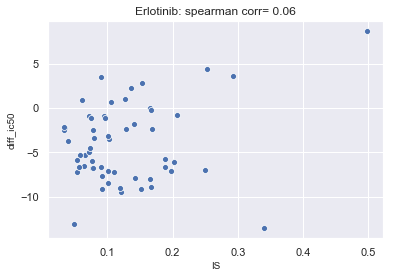

Erlotinib : 0.06


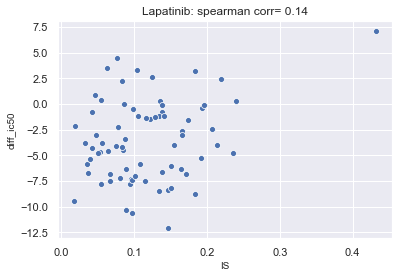

Lapatinib : 0.14


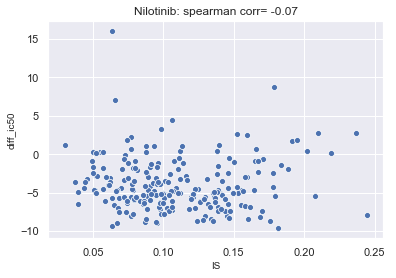

Nilotinib : -0.07


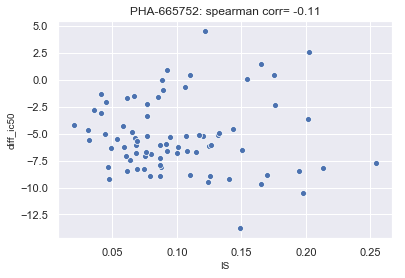

PHA-665752 : -0.11


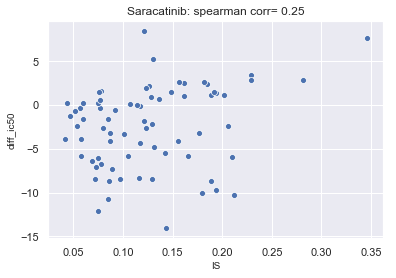

Saracatinib : 0.25


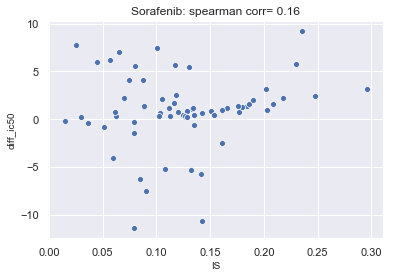

Sorafenib : 0.16


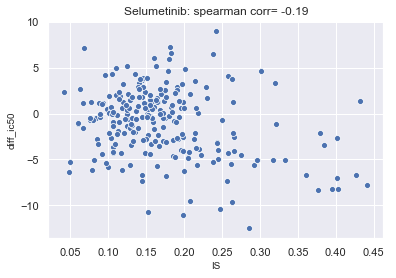

Selumetinib : -0.19


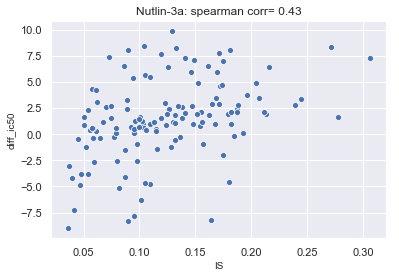

Nutlin-3a : 0.43


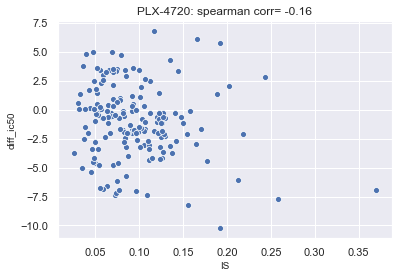

PLX-4720 : -0.16


In [31]:
df=FeatureMatrix_sp
df['diff_ic50']=df['ic50_ccle']-df['ic50_gdsc']
corr=f.plotVectorsGetCorr_seaborn('diff_ic50','IS',df,'spearman' )
plt.show()

dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    df_temp=df[df['Standard drug name']==dname]
    corr=f.plotVectorsGetCorr_seaborn('IS','diff_ic50',df_temp,'spearman' )

    plt.title(dname+": spearman corr= "+str(corr))
    plt.show()
    print(dname+" : "+str(corr)) #outlier include, gdsc muts, actlitaxel corr incsed to 0.23

plt.show() 